![](https://www.zirveinsaatyapi.com/tema/ziy/images/zingat.png)

 #### <span style="color: orange; font-family: Segoe UI; font-size: 1.7em; font-weight: 300;">Doğuş Teknoloji - Zingat - Konut Fiyat Tahmin Modeli</span>

------------------

**Buğra Sebati Erdoğan**

Gazi Üniversitesi - M.Sc Istatistik

*Ankara , Kasım 2021*

#### GİRİŞ

Pandemi etkisiyle gayrimenkul sektöründe değişen konut fiyatlarını tahmin etmek istiyoruz.
Paylaşılan veri setinde pandemi etkisi göz önünde bulundurulduğu için Ocak 2019 tarihinden itibaren ev tipi ve fiyatını etkileyen diğer değişkenlerle birlikte güncel fiyat tahminleme yapılması hedeflenmektedir.

Veriseti toplam 99700 row ve 20 değişkenden oluşmaktadır. Veri setindeki değişkenleri tanıyalım.

<table>
<tr>
    <th><center>Değişken</center></th>
    <th><center>Açıklama</center></th>
</tr>
<tr>
    <td><center>Ilan_ID</center></td>
    <td><center> Her bir ilana ait ID numaralarını içeren değişkendir.</center></td>
</tr>
<tr>
    <td><center>Tarih</center></td>
    <td><center>01.01.2019 Tarihinden itibaren başlayan zaman değişkenidir.</center></td>
</tr>
<tr>
    <td><center>Path</center></td>
    <td><center>IL/Ilce/Mahalle" formatında İstanbul'daki 5 ilçeyi barındıran object türündeki değişkendir. </center></td>
</tr>
<tr>
    <td><center>Güncel_fiyat</center></td>
    <td><center>TRY biriminde tahminlenmesi beklenen hedef değişkenimizdir.</center></td>
</tr>
<tr>
    <td><center>Odasayısı</center></td> 
    <td><center>Evin sahip olduğu oda sayısını "2+1" veya "3+1" gibi çeşitli yapılarda barındıran değişkenimizdir.</center></td>
</tr>
<tr>
    <td><center>brütm²</center></td>
    <td><center>Söz konusu evin brüt olarak kapladığı alana ait bilgi içeren değişkendir.</center></td>
</tr>
<tr>
    <td><center>netm²</center></td>
    <td><center> Söz konusu evin net olarak kapladığı alan bilgisini içeren değişkendir.</center></td>
</tr>
<tr>
    <td><center>Emlaktipi</center></td>
    <td><center>Daire, rezidans, villa, müstakil ev, Prefabrik Ev, Yalı Dairesi, Köşk / Konak / Yalı, Çiftlik Evi veya Yazlık olup olmadığını içeren değişkenlerdir. </center></td>
</tr>
<tr>
    <td><center>Binayaşı  </center></td>
    <td><center>Bina yaşının hangi aralıklarda olduğu bilgisini veren değişkendir.</center></td>
</tr>
<tr>
    <td><center>Bulunduğukat</center></td>
    <td><center>Evin binanın kaçıncı katında yer aldığı bilgisini verir.</center></td>
</tr>
<tr>
    <td><center>Manzara</center></td>
    <td><center>Cadde,Deniz,Göl, Şehir, Doğa,Dağ, Park,Boğaz,, Yeşil Alan vb. Çeşitli kombinasyonlarından oluşan ve birden fazla manzaraya da sahip olabilen değişkendir.</center></td>
</tr>
<tr>
    <td><center>Binadakikatsayısı</center></td>
    <td><center>1den 20ye kadar veya 10-20 arası değerlerden oluşmaktadır.</center></td>
</tr>
<tr>
    <td><center>Isıtmatipi</center></td>
    <td><center>Kombi (Doğalgaz), Merkezi Sistem (Isı Payı Ölçer), Merkezi Sistem, Kalorifer (Doğalgaz),Klima,Yerden Isıtma,Kat Kaloriferi,Kalorifer(Kömür), Yok,Fancoil, Kombi (Elektrikli), Soba (Doğalgaz),Soba (Kömür),Kalorifer (Akaryakıt), Güneş Enerjisi, veya Jeotermal değerlerinden oluşmaktadır.</center></td>
</tr>
<tr>
    <td><center>Banyosayisi</center></td>
    <td><center>1den 6ya kadar değerlerden oluşmaktadır.</center></td>
</tr>
<tr>
    <td><center>Otopark</center></td>
    <td><center>Var (Ücretsiz, Kapalı), Yok, Var (Ücretsiz, Açık), Var, -, Var (Açık,Kapalı), Var (Ücretli, Açık) ve Var (Ücretli, Kapalı) değerlerinden oluşmaktadır.</center></td>
</tr>
    <td><center>Diğer Değişkenler</center></td>
    <td><center>Bu değişkenlere ek olarak; - İnterkom, deprem yönetmeliğineuygun,asansör, Çocukoyunalanı, giyinmeodası, ve ebeveynbanyosu isminde dummy(var/yok) değişkenler mevcuttur.</center></td>
<tr>
</table>

#### Kütüphanelerin aktarılması

In [21]:
import pandas as pd
import numpy as np
pd.set_option("max_columns" , None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [22]:
!pip install openpyxl

In [23]:
color = ['#fdc029','#f7c14c','#f0c268','#e8c381','#dfc498',
         '#d4c5af','#c6c6c6','#a6a6a8','#86868a','#68686d',
         '#4b4c52','#303138','#171820']

In [24]:
train = pd.read_csv("../input/dogus-teknoloji-zingat/zingat_usecase_trainset.csv")
test = pd.read_csv("../input/dogus-teknoloji-zingat/zingat_usecase_testset_null.csv")
sub = pd.read_csv("../input/dogus-teknoloji-zingat/sample_submission_zingat.csv")
efektifkur = pd.read_excel("../input/indexler/efektifkur.xlsx")
kfeist = pd.read_excel("../input/indexler/istanbulkfe.xlsx")
kfeizm = pd.read_excel("../input/indexler/izmirkfe.xlsx")

In [25]:
train.head()

,tarih,path,güncel_fiyat,odasayısı,brütm²,netm²,emlaktipi,binayaşı,bulunduğukat,binadakikatsayısı,isıtmatipi,banyosayisi,manzara,otopark,İnterkom,depremyönetmeliğineuygun,asansör,Çocukoyunalanı,giyinmeodası,ebeveynbanyosu,Ilan_ID
0,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380.000,370.000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,1
1,2019-01-01,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65.000,55.000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,11
2,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205.000,197.000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,10
3,2019-01-01,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150.000,130.000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,8
4,2019-01-01,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70.000,65.000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,7


In [26]:
test.head()

,tarih,path,odasayısı,brütm²,netm²,emlaktipi,binayaşı,bulunduğukat,binadakikatsayısı,isıtmatipi,banyosayisi,manzara,otopark,İnterkom,depremyönetmeliğineuygun,asansör,Çocukoyunalanı,giyinmeodası,ebeveynbanyosu,Ilan_ID,güncel_fiyat
0,2020-04-20,İzmir/Konak/Güzelyalı,4+1,165.000,155.000,Daire,31-35 arası,6,7,Kombi (Doğalgaz),1,_,-,YOK,YOK,YOK,YOK,VAR,YOK,64650,NaN
1,2020-04-20,İzmir/Ödemiş/İnönü,2+1,130.000,120.000,Daire,6-10 arası,2,2,Klima,1,_,-,YOK,YOK,YOK,YOK,YOK,YOK,64651,NaN
2,2020-04-20,İzmir/Karşıyaka/Örnekköy,3+1,182.000,153.000,Daire,0,7,10-20 arası,Yerden Isıtma,2,_,-,YOK,YOK,YOK,YOK,YOK,YOK,64652,NaN
3,2020-04-20,İzmir/Ödemiş/İnönü,2+1,130.000,120.000,Daire,6-10 arası,2,2,Klima,1,_,-,YOK,YOK,YOK,YOK,YOK,YOK,64653,NaN
4,2020-04-20,İstanbul/Beylikdüzü/Kavaklı,3+1,125.000,120.000,Daire,0,6,6,Kombi (Doğalgaz),1,"Boğaz,Cadde,Dağ,Deniz,Doğa,Göl",-,VAR,VAR,VAR,VAR,VAR,VAR,64654,NaN


In [27]:
sub.head()

,Id,Expected
0,64650,0
1,64651,0
2,64652,0
3,64653,0
4,64654,0


In [28]:
kfeist.head()

,Yil,kfeist,Sehir,Ay
0,2019,100.200,İstanbul,1
1,2019,99.700,İstanbul,2
2,2019,99.600,İstanbul,3
3,2019,100.000,İstanbul,4
4,2019,100.400,İstanbul,5


In [29]:
kfeizm.head()

,Yil,izmirkfe,Sehir,Ay
0,2019,111.000,İzmir,1
1,2019,112.500,İzmir,2
2,2019,113.500,İzmir,3
3,2019,113.100,İzmir,4
4,2019,114.600,İzmir,5


In [30]:
efektifkur.head()

,Tarih,Kur
0,01-01-2019,NaN
1,02-01-2019,5.298
2,03-01-2019,5.349
3,04-01-2019,5.477
4,05-01-2019,NaN


Veri setini inceledikten sonra, ilk olarak bağımlı değişkendeki TRY'yi kaldırarak ve değişken isimlerini türkçe karakterlerden arındırarak başlıyoruz...

In [31]:
train["güncel_fiyat"] = train["güncel_fiyat"].str.strip("TRY")
train["güncel_fiyat"] = train["güncel_fiyat"].astype(int)

In [32]:
train = train.rename(columns = {"brütm²":"brutm2"})
train = train.rename(columns = {"netm²" :"netm2"})
train = train.rename(columns = {"güncel_fiyat" : "price"})
train = train.rename(columns = {"odasayısı" : "oda"})
train = train.rename(columns = {"binayaşı" : "binayasi"})
train = train.rename(columns = {"bulunduğukat" : "bulundugukat"})
train = train.rename(columns = {"isıtmatipi" : "isitmatipi"})
train = train.rename(columns = {"İnterkom" : "interkom"})
train = train.rename(columns = {"depremyönetmeliğineuygun" : "depremeuygunluk"})
train = train.rename(columns = {"Çocukoyunalanı" : "cocukalani"})
train = train.rename(columns = {"asansör" : "asansor"})
train = train.rename(columns = {"giyinmeodası" : "giyinmeodasi"})
train = train.rename(columns = {"Ilan_ID" : "id"})
test = test.rename(columns = {"brütm²":"brutm2"})
test = test.rename(columns = {"netm²" :"netm2"})
test = test.rename(columns = {"güncel_fiyat" : "price"})
test = test.rename(columns = {"odasayısı" : "oda"})
test = test.rename(columns = {"binayaşı" : "binayasi"})
test = test.rename(columns = {"bulunduğukat" : "bulundugukat"})
test = test.rename(columns = {"isıtmatipi" : "isitmatipi"})
test = test.rename(columns = {"İnterkom" : "interkom"})
test = test.rename(columns = {"asansör" : "asansor"})
test = test.rename(columns = {"depremyönetmeliğineuygun" : "depremeuygunluk"})
test = test.rename(columns = {"Çocukoyunalanı" : "cocukalani"})
test = test.rename(columns = {"giyinmeodası" : "giyinmeodasi"})
test = test.rename(columns = {"Ilan_ID" : "id"})

In [33]:
print(str("Train Seti -- Başlangıç:  ") + train.tarih.min() + str("  Bitiş:  ") + train.tarih.max())
print(str("Test Seti -- Başlangıç:  ") + test.tarih.min() + str("  Bitiş:  ") + test.tarih.max())

Train Seti -- Başlangıç:  2019-01-01  Bitiş:  2020-04-19
Test Seti -- Başlangıç:  2020-04-20  Bitiş:  2020-12-31


In [34]:
print(f"Train setinde {train.shape[0]} tane , test setinde ise {test.shape[0]} tane gözlem var")

Train setinde 64573 tane , test setinde ise 35127 tane gözlem var


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tarih              64573 non-null  object 
 1   path               64573 non-null  object 
 2   price              64573 non-null  int64  
 3   oda                64573 non-null  object 
 4   brutm2             64573 non-null  float64
 5   netm2              64573 non-null  float64
 6   emlaktipi          64573 non-null  object 
 7   binayasi           64573 non-null  object 
 8   bulundugukat       64573 non-null  object 
 9   binadakikatsayısı  64573 non-null  object 
 10  isitmatipi         64573 non-null  object 
 11  banyosayisi        64573 non-null  object 
 12  manzara            64573 non-null  object 
 13  otopark            64573 non-null  object 
 14  interkom           64573 non-null  object 
 15  depremeuygunluk    64573 non-null  object 
 16  asansor            645

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35127 entries, 0 to 35126
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tarih              35127 non-null  object 
 1   path               35127 non-null  object 
 2   oda                35127 non-null  object 
 3   brutm2             35127 non-null  float64
 4   netm2              35127 non-null  float64
 5   emlaktipi          35127 non-null  object 
 6   binayasi           35127 non-null  object 
 7   bulundugukat       35127 non-null  object 
 8   binadakikatsayısı  35127 non-null  object 
 9   isitmatipi         35127 non-null  object 
 10  banyosayisi        35127 non-null  object 
 11  manzara            35127 non-null  object 
 12  otopark            35127 non-null  object 
 13  interkom           35127 non-null  object 
 14  depremeuygunluk    35127 non-null  object 
 15  asansor            35127 non-null  object 
 16  cocukalani         351

In [37]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,64573.000,977799.931,5094148.372,172.000,240000.000,380000.000,750000.000,530000000.000
brutm2,64573.000,185.902,2671.848,1.000,100.000,125.000,155.000,370000.000
netm2,64573.000,127.894,765.583,1.000,90.000,110.000,135.000,145000.000
id,64573.000,32287.000,18640.764,1.000,16144.000,32287.000,48430.000,64573.000


In [38]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
brutm2,35127.000,183.095,2836.606,7.000,100.000,125.000,159.000,500000.000
netm2,35127.000,127.864,431.796,2.000,86.000,110.000,135.000,73361.000
id,35127.000,82137.000,10140.436,64574.000,73355.500,82137.000,90918.500,99700.000
price,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
## Eksik gözlem var mı ?

train.isna().sum()

tarih                0
path                 0
price                0
oda                  0
brutm2               0
netm2                0
emlaktipi            0
binayasi             0
bulundugukat         0
binadakikatsayısı    0
isitmatipi           0
banyosayisi          0
manzara              0
otopark              0
interkom             0
depremeuygunluk      0
asansor              0
cocukalani           0
giyinmeodasi         0
ebeveynbanyosu       0
id                   0
dtype: int64

In [40]:
## Test seti eksik gözlem var mı ? 

test.isna().sum()

tarih                    0
path                     0
oda                      0
brutm2                   0
netm2                    0
emlaktipi                0
binayasi                 0
bulundugukat             0
binadakikatsayısı        0
isitmatipi               0
banyosayisi              0
manzara                  0
otopark                  0
interkom                 0
depremeuygunluk          0
asansor                  0
cocukalani               0
giyinmeodasi             0
ebeveynbanyosu           0
id                       0
price                35127
dtype: int64

#### Data Preprocessing 

#### M2 değişkenleri

Brutm2 ve netm2 'deki farklılıkları göz önünde bulundurmak için ,ikisinden hangisinin max olduğu ile ilgili bir değişken oluşturdum.

Bu durum çoklu doğrusallığa yol açabilir buna ilerleyen aşamalarda dikkat etmemiz gerekiyor.


In [41]:
features = ["brutm2","netm2"]
train["m2"] = train[features].max(axis = 1)
test["m2"] = test[features].max(axis = 1)

#### Manzara değişkeni

Manzara değişkenine baktığımız zaman çok fazla unique gözlem mevcut bu durum bizler için pek iyi sayılmaz.
Bu durumdan kendimi kurtarmak için sadece virgülden önceki ilk kelimeyi alacağım. Bunun sebebi de aslında bu değişkende bizim için önemli kısım, boğaz manzarası gibi fiyatı etkileyen pozitif korelasyonlu durumlar. Boğaz manzarası kısmı da genellikle ilk kelimeden gelmiş değişkene, bu yüzden sadece ilk kelimeyi kullanarak yeni bir değişken oluşturacağım.

In [42]:
train.manzara.value_counts()

_                                                                        41713
Şehir                                                                     7631
Doğa,Şehir                                                                2092
Cadde,Şehir                                                               1018
Boğaz,Cadde,Deniz,Havuz,Park,Şehir,Yeşil Alan,Göl,Nehir,Vadi,Dağ,Doğa      960
                                                                         ...  
Deniz,Yeşil Alan,Vadi,Havuz,Doğa,Park                                        1
Deniz,Yeşil Alan,Havuz,Doğa,Park                                             1
Cadde,Park,Şehir,Yeşil Alan,Göl,Nehir                                        1
Göl,Dağ                                                                      1
Yeşil Alan,Boğaz,Deniz,Park,Şehir                                            1
Name: manzara, Length: 917, dtype: int64

In [43]:
b = train.manzara.str.split("," , expand = True)
b.columns = ["a","b","c","d","e","f","g","h","j","k","l","m"]
b.drop(["b","c","d","e","f","g","h","j","k","l","m"] , axis = 1 , inplace = True)
b.columns = ["manzarasekli"]
b.loc[b["manzarasekli"] == "_" , "manzarasekli"] = "Yok"
train = (pd.merge(train, b, how = "left", left_index = True , right_index = True)).reset_index()

In [44]:
a = test.manzara.str.split("," , expand = True)
a.columns = ["a","b","c","d","e","f","g","h","j","k","l","m"]
a.drop(["b","c","d","e","f","g","h","j","k","l","m"] , axis = 1 , inplace = True)
a.columns = ["manzarasekli"]
a.loc[a["manzarasekli"] == "_" , "manzarasekli"] = "Yok"
test = (pd.merge(test, a, how = "left", left_index = True , right_index = True)).reset_index()

In [45]:
test.drop(["index"], axis = 1 , inplace = True)
train.drop(["index"], axis = 1 , inplace = True)

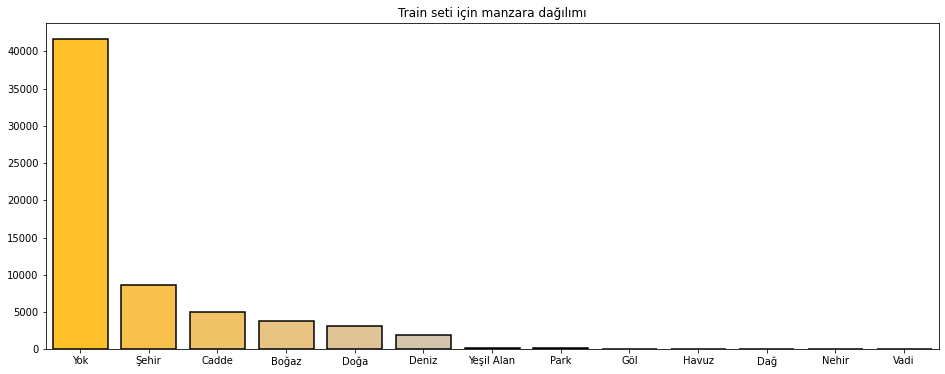

In [46]:
fig = plt.subplots(figsize = (16,6))

sns.barplot(x = train["manzarasekli"].value_counts().index, y = train["manzarasekli"].value_counts().values, palette = color,
           edgecolor = "black", linewidth = 1.5, saturation = 1.5)
plt.title("Train seti için manzara dağılımı");

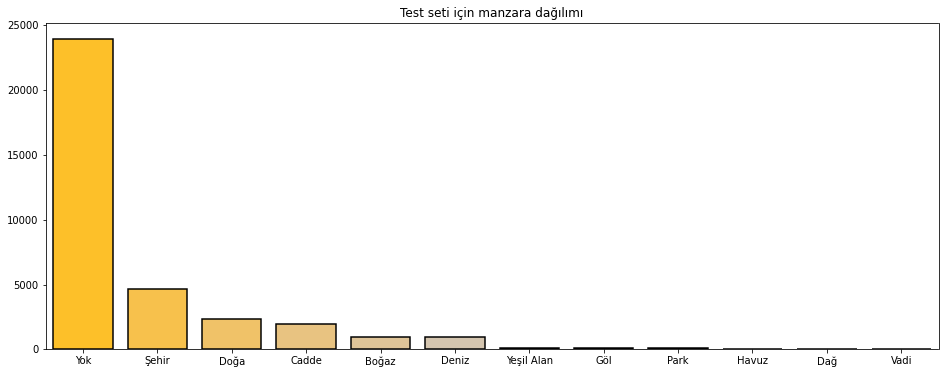

In [47]:
fig = plt.subplots(figsize = (16,6))

sns.barplot(x = test["manzarasekli"].value_counts().index, y = test["manzarasekli"].value_counts().values, palette = color,
           edgecolor = "black", linewidth = 1.5, saturation = 1.5)
plt.title("Test seti için manzara dağılımı");

#### Path değişkeni

Bu değişkeni il-ilçe-mahalle olarak ayrı ayrı değişkenler olarak ele alacağız. 

In [48]:
a = train.path.str.split("/", expand = True)
a.columns = ["Sehir","Ilce","Mahalle"]
train = (pd.merge(train, a, how = "left", left_index = True , right_index = True)).reset_index()

In [49]:
b = test.path.str.split("/", expand = True)
b.columns = ["Sehir","Ilce","Mahalle"]
test = (pd.merge(test, b, how = "left", left_index = True , right_index = True)).reset_index()

In [50]:
test.drop(["index"], axis = 1 , inplace = True)
train.drop(["index"], axis = 1 , inplace = True)

Geri kalan veri ön işleme aşamalarına kısa bir ara... Şimdi tamamen kendi tespitlerimizle eğitim setini ilginç gözlemlerden arındıracağız peki nedir bu ilginç gözlemler ? Bunu anlayabilmek için bazı sorulara ihtiyacımız var :)

**1-** Türkiye şartlarında İstanbul ve İzmir'de değeri 80.000TL'den düşük 3+1 ev bulmak ne kadar olanaklı ?

**2-** M2'si 15'den düşük bir daire olabilir mi ?

**3-** Bağcılarda,Beylikdüzünde,Pendikte boğaz manzaralı bir daire olabilir mi ?

**4-** Değeri 500.000TL'den düşük bir yalı düşünebilir miyiz ?

Bu soruları daha da çoğaltabiliriz fakat bu kadar örneklendirme için yeterli diye düşünüyorum. Şimdi bu gözlemlere ulaşmaya çalışacağız ve bu gözlemleri eğitim setinden şutlayacağız :9

Bu aşamada biraz gözlem kaybedeceğiz ama buna değeceğini düşünüyorum. Çünkü tahminleri yanlış yönlendirebilecek tehlikeler bunlar.

In [51]:
## Örneğin 

train[(train.m2 < 15) & (train.emlaktipi == "Daire")]

,tarih,path,price,oda,brutm2,netm2,emlaktipi,binayasi,bulundugukat,binadakikatsayısı,isitmatipi,banyosayisi,manzara,otopark,interkom,depremeuygunluk,asansor,cocukalani,giyinmeodasi,ebeveynbanyosu,id,m2,manzarasekli,Sehir,Ilce,Mahalle
326,2019-01-03,İstanbul/Beylikdüzü/Kavaklı,445000,4+1,10.000,1.000,Daire,-,-,-,-,2,_,-,YOK,YOK,YOK,YOK,YOK,YOK,222,10.000,Yok,İstanbul,Beylikdüzü,Kavaklı
1979,2019-01-17,İstanbul/Beylikdüzü/Adnan Kahveci,215000,2+1,2.000,1.000,Daire,0,5,9,Kombi (Doğalgaz),1,"Cadde,Havuz,Park,Şehir,Yeşil Alan",-,VAR,VAR,VAR,VAR,VAR,VAR,2087,2.000,Cadde,İstanbul,Beylikdüzü,Adnan Kahveci
61528,2020-03-24,İstanbul/Beylikdüzü/Yakuplu,139000,2+1,11.000,5.000,Daire,0,2,10,Kombi (Doğalgaz),1,"Boğaz,Cadde,Dağ,Deniz,Doğa,Göl,Havuz,Nehir,Par...",Var,VAR,VAR,VAR,VAR,VAR,VAR,61614,11.000,Boğaz,İstanbul,Beylikdüzü,Yakuplu


In [52]:
## Örneğin vol2
## Görünen o ki Bağcılar'a boğaz gelmiş. Teşekkürler İmamoğlu :d

train[(train.Ilce == "Bağcılar") & (train.manzarasekli == "Boğaz")]

,tarih,path,price,oda,brutm2,netm2,emlaktipi,binayasi,bulundugukat,binadakikatsayısı,isitmatipi,banyosayisi,manzara,otopark,interkom,depremeuygunluk,asansor,cocukalani,giyinmeodasi,ebeveynbanyosu,id,m2,manzarasekli,Sehir,Ilce,Mahalle
4376,2019-02-03,İstanbul/Bağcılar/Göztepe,17950,1+0,40.000,30.000,Daire,26-30 arası,-,-,Yerden Isıtma,1,"Boğaz,Deniz,Şehir,Göl,Doğa","Var (Ücretsiz, Kapalı)",VAR,YOK,VAR,YOK,VAR,VAR,4287,40.000,Boğaz,İstanbul,Bağcılar,Göztepe
9908,2019-03-18,İstanbul/Bağcılar/Kazım Karabekir,325000,2+1,110.000,100.000,Daire,6-10 arası,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,9855,110.000,Boğaz,İstanbul,Bağcılar,Kazım Karabekir
10112,2019-03-20,İstanbul/Bağcılar/Fatih,625000,5+1,290.000,250.000,Daire,0,Bahçe katı,4,Klima,2,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,10197,290.000,Boğaz,İstanbul,Bağcılar,Fatih
10160,2019-03-20,İstanbul/Bağcılar/15 Temmuz,360000,4+1,200.000,180.000,Daire,0,4,4,Klima,3,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,10213,200.000,Boğaz,İstanbul,Bağcılar,15 Temmuz
10602,2019-03-23,İstanbul/Bağcılar/15 Temmuz,258000,2+1,90.000,80.000,Daire,6-10 arası,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,10542,90.000,Boğaz,İstanbul,Bağcılar,15 Temmuz
10959,2019-03-26,İstanbul/Bağcılar/Fatih,425000,3+1,145.000,130.000,Daire,0,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,10901,145.000,Boğaz,İstanbul,Bağcılar,Fatih
11242,2019-03-28,İstanbul/Bağcılar/Yenimahalle,105000,2+1,113.000,100.000,Daire,16-20 arası,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,11133,113.000,Boğaz,İstanbul,Bağcılar,Yenimahalle
13937,2019-04-17,İstanbul/Bağcılar/Sancaktepe,330000,2+1,95.000,90.000,Daire,0,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,13856,95.000,Boğaz,İstanbul,Bağcılar,Sancaktepe
13974,2019-04-17,İstanbul/Bağcılar/Yavuz Selim,225000,1+1,70.000,65.000,Daire,0,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,13907,70.000,Boğaz,İstanbul,Bağcılar,Yavuz Selim
14033,2019-04-18,İstanbul/Bağcılar/Sancaktepe,359000,2+1,100.000,90.000,Daire,0,Bahçe katı,4,Klima,1,"Boğaz,Deniz,Şehir,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,14131,100.000,Boğaz,İstanbul,Bağcılar,Sancaktepe


In [53]:
## Price ile alakalı olanlar

train = train.drop(train[(train.price > 100000000) & (train.Ilce == "Bağcılar")].index)
train = train.drop(train[(train.price < 80000) & (train.emlaktipi == "Daire") & (train.oda == "3+1")].index)
train = train.drop(train[(train.price < 20000) & (train.emlaktipi == "Daire")].index)
train = train.drop(train[(train.price < 20000) & (train.emlaktipi == "Daire") & (train.oda == "2+1")].index)
train = train.drop(train[(train.price < 10000) & (train.emlaktipi == "Daire")].index)
train = train.drop(train[(train.emlaktipi == "Yalı Dairesi") & (train.price < 500000)].index)
train = train.drop(train[(train.price == 100000000 )].index)
train = train.drop(train[(train.price < 100000) & (train.emlaktipi == "Rezidans")].index)
train = train.drop(train[(train.price < 100000) & (train.emlaktipi == "Villa")].index)

## M2 ile alakalı olanlar

train = train.drop(train[(train.m2 < 200) & (train.emlaktipi == "Köşk / Konak / Yalı")].index)
train = train.drop(train[(train.m2 < 15) & (train.emlaktipi == "Daire")].index)
train = train.drop(train[(train.m2 < 15) & (train.emlaktipi == "Villa")].index)
train = train.drop(train[(train.m2 < 15) & (train.emlaktipi == "Köşk / Konak / Yalı")].index)
train = train.drop(train[(train.m2 > 1000) & (train.emlaktipi == "Daire")].index)
train = train.drop(train[(train.m2 > 500) & (train.oda == "1+1")].index)
train = train.drop(train[(train.m2 > 2000)].index)
train = train.drop(train[(train.netm2 < 10)].index)

## Ve diğerleri

train = train.drop(train[(train.id == 1845)].index)
train = train.drop(train[(train.id == 2682)].index)
train = train.drop(train[(train.id == 2682)].index)
train = train.drop(train[(train.id == 3324)].index)
train = train.drop(train[(train.id == 57167)].index)
train = train.drop(train[(train.id == 36831)].index)
train = train.drop(train[(train.id == 33259)].index)
train = train.drop(train[(train.id == 18185)].index)
train = train.drop(train[(train.id == 62507)].index)
train = train.drop(train[(train.manzarasekli == "Boğaz") & (train.Ilce == "Beylikdüzü")].index)
train = train.drop(train[(train.manzarasekli == "Boğaz") & (train.Ilce == "Pendik")].index)
train = train.drop(train[(train.manzarasekli == "Boğaz") & (train.Ilce == "Bağcılar")].index)

In [54]:
train.price = train.price.astype(int)
train.shape

(61411, 26)

Kalan veri ön işleme aşamalarına train ve test setlerini birleştirerek devam ediyoruz...

In [55]:
df = pd.concat((train,test)).reset_index(drop = True)
df.tail()

,tarih,path,price,oda,brutm2,netm2,emlaktipi,binayasi,bulundugukat,binadakikatsayısı,isitmatipi,banyosayisi,manzara,otopark,interkom,depremeuygunluk,asansor,cocukalani,giyinmeodasi,ebeveynbanyosu,id,m2,manzarasekli,Sehir,Ilce,Mahalle
96533,2020-12-31,İzmir/Urla/İçmeler,NaN,4+1,200.000,180.000,Villa,11-15 arası,Müstakil,3,Klima,2,_,-,YOK,YOK,YOK,YOK,YOK,YOK,99666,200.000,Yok,İzmir,Urla,İçmeler
96534,2020-12-31,İstanbul/Bağcılar/Fevzi Çakmak,NaN,2+1,85.000,65.000,Daire,21-25 arası,Yüksek Giriş,5,Kombi (Doğalgaz),1,_,-,YOK,YOK,YOK,YOK,YOK,YOK,99667,85.000,Yok,İstanbul,Bağcılar,Fevzi Çakmak
96535,2020-12-31,İzmir/Seferihisar/Turabiye,NaN,3+1,125.000,120.000,Daire,2,2,4,Kombi (Doğalgaz),2,_,-,YOK,YOK,VAR,YOK,YOK,YOK,99668,125.000,Yok,İzmir,Seferihisar,Turabiye
96536,2020-12-31,İzmir/Foça/Fevzipaşa,NaN,7+1,427.000,245.000,Müstakil Ev,40 ve üzeri,Müstakil,2,Soba (Doğalgaz),1,_,Yok,YOK,YOK,YOK,YOK,YOK,YOK,99656,427.000,Yok,İzmir,Foça,Fevzipaşa
96537,2020-12-31,İstanbul/Bağcılar/Fevzi Çakmak,NaN,2+1,85.000,65.000,Daire,21-25 arası,Yüksek Giriş,5,Kombi (Doğalgaz),1,_,-,YOK,YOK,YOK,YOK,YOK,YOK,99700,85.000,Yok,İstanbul,Bağcılar,Fevzi Çakmak


#### Tarih Değişkeni

Tarih değişkenini gün/ay/yıl olarak böleceğim ve ayrıyetten yılın kaçıncı haftası olduğunu ekstra değişken olarak ekleyeceğim.

In [56]:
def date(data) : 
    df["tarih"] = pd.to_datetime(df["tarih"])
    df["Yil"] = df.tarih.dt.year
    df["Ay"] = df.tarih.dt.month
    df["Gun"] = df.tarih.dt.day
    df["YilinHaftasi"] = df.tarih.dt.isocalendar().week

In [57]:
date(df)
df.YilinHaftasi = df.YilinHaftasi.astype(int)

#### Dış kaynaklı veriler

1- Efektif Döviz kuru

2- İstanbul ve İzmir için konut fiyat endexleri

In [58]:
efektifkur.head()

,Tarih,Kur
0,01-01-2019,NaN
1,02-01-2019,5.298
2,03-01-2019,5.349
3,04-01-2019,5.477
4,05-01-2019,NaN


In [59]:
efektifkur.Kur = efektifkur.Kur.fillna(method = "ffill")

In [60]:
efektifkur.Kur = efektifkur.Kur.fillna(method = "bfill")

In [61]:
b = efektifkur.Tarih.str.split("-" , expand = True)
b.columns = ["Gun","Ay","Yil"]
ab = (pd.merge(efektifkur, b, how = "left", left_index = True , right_index = True)).reset_index()
ab.drop(["index","Tarih"], axis = 1 , inplace = True)
ab.Yil = ab.Yil.astype(int)
ab.Ay = ab.Ay.astype(int)
ab.Gun = ab.Gun.astype(int)
ab.Kur = ab.Kur.astype(float)

In [62]:
df = (pd.merge(df, ab, how = "left", on = ["Yil","Ay","Gun"])).reset_index()
df.drop(["index"], axis = 1 , inplace = True)

In [63]:
kfeizm.head()

,Yil,izmirkfe,Sehir,Ay
0,2019,111.000,İzmir,1
1,2019,112.500,İzmir,2
2,2019,113.500,İzmir,3
3,2019,113.100,İzmir,4
4,2019,114.600,İzmir,5


In [64]:
kfeist.head()

,Yil,kfeist,Sehir,Ay
0,2019,100.200,İstanbul,1
1,2019,99.700,İstanbul,2
2,2019,99.600,İstanbul,3
3,2019,100.000,İstanbul,4
4,2019,100.400,İstanbul,5


In [65]:
df = (pd.merge(df, kfeist, how = "left", on = ["Yil","Ay","Sehir"])).reset_index()
df = (pd.merge(df, kfeizm, how = "left", on = ["Yil","Ay","Sehir"])).reset_index()

df.drop(["index"], axis = 1 , inplace = True)

In [66]:
df.kfeist = df.kfeist.fillna(0)
df.izmirkfe = df.izmirkfe.fillna(0)
df["kfe"] = df.kfeist + df.izmirkfe
df.drop(["kfeist","izmirkfe","level_0"], axis = 1 , inplace = True)

In [67]:
df.head()

,tarih,path,price,oda,brutm2,netm2,emlaktipi,binayasi,bulundugukat,binadakikatsayısı,isitmatipi,banyosayisi,manzara,otopark,interkom,depremeuygunluk,asansor,cocukalani,giyinmeodasi,ebeveynbanyosu,id,m2,manzarasekli,Sehir,Ilce,Mahalle,Yil,Ay,Gun,YilinHaftasi,Kur,kfe
0,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,1050000.000,5+2,380.000,370.000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,1,380.000,Cadde,İstanbul,Beylikdüzü,Adnan Kahveci,2019,1,1,1,5.298,100.200
1,2019-01-01,İstanbul/Kadıköy/Erenköy,547500.000,2+1,65.000,55.000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,11,65.000,Yok,İstanbul,Kadıköy,Erenköy,2019,1,1,1,5.298,100.200
2,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,440000.000,3+1,205.000,197.000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,10,205.000,Cadde,İstanbul,Beylikdüzü,Adnan Kahveci,2019,1,1,1,5.298,100.200
3,2019-01-01,İstanbul/Beşiktaş/Nisbetiye,1450000.000,3+1,150.000,130.000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,8,150.000,Cadde,İstanbul,Beşiktaş,Nisbetiye,2019,1,1,1,5.298,100.200
4,2019-01-01,İstanbul/Beylikdüzü/Cumhuriyet,180000.000,2+1,110.000,95.000,Daire,0,2,6,Kombi (Doğalgaz),1,Şehir,Yok,YOK,VAR,VAR,VAR,YOK,YOK,9,110.000,Şehir,İstanbul,Beylikdüzü,Cumhuriyet,2019,1,1,1,5.298,100.200


#### Encode işlemleri

LabelEncoder kullanmak yerine değişkenleri kendim encode etmek istiyorum. Bunun sebebi ordinallik. Peki bu ordinallik bana ne sağlayacak ? Bütün değişkenlerimiz sayısal olarak arttığı zaman bağımlı değişkenimizi de pozitif olarak etkileyebilecek durumda. Bunu göz önünde bulundurarak , axis = 1 gözlemler için bir toplam değişkeni oluşturacağım. Bir nevi skorlama gibi düşünülebilir, modele de iyi bir etki yapacağını düşünüyorum.

Bu skorlamayı bir sonraki aşamada yapacağız.

Aşağıdaki encode işlemlerinde, özellikle fiyatı arttıracağını düşündüğüm kategorilere sayısal anlamda büyük değerler vermeye çalıştım (2-3 gibi). Kategoriler arası farkları olabildiğince korumaya çalıştım(olabildiğince?!!!). Küçük bir örnek vermek gerekirse binayaşı 0 olan kategoriye 3 değerini verdim, binayaşı 40+ olan kategoriye 0 değerini verdim. Bu fiyat bağlamında düşündüğümüz zaman iyi bir hareket diye düşünüyorum.Çünkü eski bir binanın doğal olarak fiyatı diğerlerine göre düşük olacaktır.(yalılar hariç tabii ama bir yerden fedakarlık etmek gerekiyordu.)

İkili değişkenler için de 1 ve 0 değerleri ile encode yaptım bu değerleri de yine olumlu etkiyi 1 negatif etkiyi 0 olarak aldım.

In [68]:
## bulundugukat değişkeni için encode

df.loc[df["bulundugukat"] == "-" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "1" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "Bahçe katı" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "Zemin Kat" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "2" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "3" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "4" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "5" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "Teras Kat" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "En Üst Kat" , "bulundugukat"] = "2"
df.loc[df["bulundugukat"] == "Kot 1" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "Yüksek Giriş" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "Kot 3" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "Kot 4" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "Kot 2" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "Bodrum Kat" , "bulundugukat"] = "0"
df.loc[df["bulundugukat"] == "6" , "bulundugukat"] = "3"
df.loc[df["bulundugukat"] == "7" , "bulundugukat"] = "3"
df.loc[df["bulundugukat"] == "8" , "bulundugukat"] = "3"
df.loc[df["bulundugukat"] == "9" , "bulundugukat"] = "3"
df.loc[df["bulundugukat"] == "10" , "bulundugukat"] = "3"
df.loc[df["bulundugukat"] == "11" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "12" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "13" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "14" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "15" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "16" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "17" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "18" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "19" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "20 ve üzeri" , "bulundugukat"] = "4"
df.loc[df["bulundugukat"] == "Müstakil" , "bulundugukat"] = "5"
df.loc[df["bulundugukat"] == "Giriş Katı" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "Çatı Katı" , "bulundugukat"] = "1"
df.loc[df["bulundugukat"] == "Komple" , "bulundugukat"] = "5"
df.bulundugukat= df.bulundugukat.astype(int)

In [69]:
## binayasi değişkeni için encode

df.loc[df["binayasi"] == "0" , "binayasi"] = "3"
df.loc[df["binayasi"] == "1" , "binayasi"] = "3"
df.loc[df["binayasi"] == "2" , "binayasi"] = "3"
df.loc[df["binayasi"] == "3" , "binayasi"] = "3"
df.loc[df["binayasi"] == "4" , "binayasi"] = "3"
df.loc[df["binayasi"] == "5" , "binayasi"] = "3"
df.loc[df["binayasi"] == "-" , "binayasi"] = "1"
df.loc[df["binayasi"] == "11-15 arası" , "binayasi"] = "2"
df.loc[df["binayasi"] == "6-10 arası" , "binayasi"] = "2"
df.loc[df["binayasi"] == "16-20 arası" , "binayasi"] = "1"
df.loc[df["binayasi"] == "21-25 arası" , "binayasi"] = "1"
df.loc[df["binayasi"] == "26-30 arası" , "binayasi"] = "1"
df.loc[df["binayasi"] == "31-35 arası" , "binayasi"] = "0"
df.loc[df["binayasi"] == "36-40 arası" , "binayasi"] = "0"
df.loc[df["binayasi"] == "40 ve üzeri" , "binayasi"] = "0"
df.binayasi = df.binayasi.astype(int)

In [70]:
## isitmatipi değişkeni için encode

df.loc[df["isitmatipi"] == "Yok" , "isitmatipi"] = "0"
df.loc[df["isitmatipi"] == "Soba (Doğalgaz)" , "isitmatipi"] = "0"
df.loc[df["isitmatipi"] == "Soba (Kömür)" , "isitmatipi"] = "0"
df.loc[df["isitmatipi"] == "Kat Kaloriferi" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Merkezi Sistem (Isı Payı Ölçer)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Kombi (Doğalgaz)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Kalorifer (Doğalgaz)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Kombi (Elektrikli)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Kalorifer (Akaryakıt)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Klima" , "isitmatipi"] = "2"
df.loc[df["isitmatipi"] == "Kalorifer (Kömür)" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Fancoil" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "-" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Merkezi Sistem" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Fancoil" , "isitmatipi"] = "1"
df.loc[df["isitmatipi"] == "Yerden Isıtma" , "isitmatipi"] = "2"
df.loc[df["isitmatipi"] == "Jeotermal" , "isitmatipi"] = "2"
df.loc[df["isitmatipi"] == "Güneş Enerjisi" , "isitmatipi"] = "2"
df.isitmatipi = df.isitmatipi.astype(int)

In [71]:
## Değişkenlerdeki bazı durumları birleştiriyorum.Aralarında yanlış gözlemler de mevcut.

df.loc[df["oda"] == "1149+0" , "oda"] = "3+1"
df.loc[df["oda"] == "19+4" , "oda"] = "19+6"
df.loc[df["oda"] == "12+3" , "oda"] = "14+3"
df.loc[df["oda"] == "-" , "oda"] = "2+1"
df.loc[df["emlaktipi"] == "Yalı Dairesi" , "emlaktipi"] = "Köşk / Konak / Yalı"


In [72]:
## otopark değişkeni için encode

df.loc[df["otopark"] == "Var (Ücretsiz, Kapalı)" , "otopark"] = "1"
df.loc[df["otopark"] == "Var (Ücretsiz, Açık)" , "otopark"] = "1"
df.loc[df["otopark"] == "Var" , "otopark"] = "1"
df.loc[df["otopark"] == "Var (Ücretli, Kapalı)" , "otopark"] = "1"
df.loc[df["otopark"] == "Var (Ücretli, Açık)" , "otopark"] = "1" 
df.loc[df["otopark"] == "Var (Açık,Kapalı)" , "otopark"] = "1"
df.loc[df["otopark"] == "-" , "otopark"] = "0"
df.loc[df["otopark"] == "Yok" , "otopark"] = "0"
df.otopark = df.otopark.astype(int)

In [73]:
## ikili değişkenler için encode

df.loc[df["interkom"] == "VAR" , "interkom"] = "1"
df.loc[df["interkom"] == "YOK" , "interkom"] = "0"
df["interkom"] = df["interkom"].astype(int)

df.loc[df["depremeuygunluk"] == "VAR" , "depremeuygunluk"] = "1"
df.loc[df["depremeuygunluk"] == "YOK" , "depremeuygunluk"] = "0"
df["depremeuygunluk"] = df["depremeuygunluk"].astype(int)

df.loc[df["asansor"] == "VAR" , "asansor"] = "1"
df.loc[df["asansor"] == "YOK" , "asansor"] = "0"
df["asansor"] = df["asansor"].astype(int)

df.loc[df["cocukalani"] == "VAR" , "cocukalani"] = "1"
df.loc[df["cocukalani"] == "YOK" , "cocukalani"] = "0"
df["cocukalani"] = df["cocukalani"].astype(int)

df.loc[df["giyinmeodasi"] == "VAR" , "giyinmeodasi"] = "1"
df.loc[df["giyinmeodasi"] == "YOK" , "giyinmeodasi"] = "0"
df["giyinmeodasi"] = df["giyinmeodasi"].astype(int)

df.loc[df["ebeveynbanyosu"] == "VAR" , "ebeveynbanyosu"] = "1"
df.loc[df["ebeveynbanyosu"] == "YOK" , "ebeveynbanyosu"] = "0"
df["ebeveynbanyosu"] = df["ebeveynbanyosu"].astype(int)



In [74]:
df.loc[df["banyosayisi"] == "6 ve üzeri" , "banyosayisi"] = "6"
df.loc[df["banyosayisi"] == "-" , "banyosayisi"] = "1"
df.loc[df["banyosayisi"] == "0" , "banyosayisi"] = "1"
df.banyosayisi = df.banyosayisi.astype(int)

In [75]:
df.loc[df["manzarasekli"] == "Yok" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Şehir" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Cadde" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Doğa" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Deniz" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Yeşil Alan" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Göl" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Park" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Göl" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Havuz" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Dağ" , "manzarasekli"] = "0"
df.loc[df["manzarasekli"] == "Vadi" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Nehir" , "manzarasekli"] = "1"
df.loc[df["manzarasekli"] == "Boğaz" , "manzarasekli"] = "2"
df.manzarasekli = df.manzarasekli.astype(int)

#### Bazı Açıklayıcı Görselleştirmeler

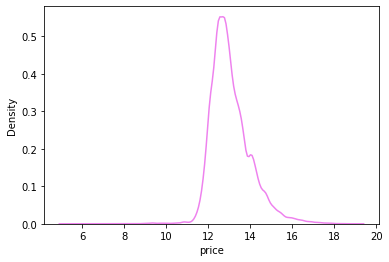

In [76]:
## karşımızda bağımlı değişkenimiz. modele de logaritmik şekilde alacağım.

sns.distplot(np.log1p(train.price) , hist = False , color = "violet");

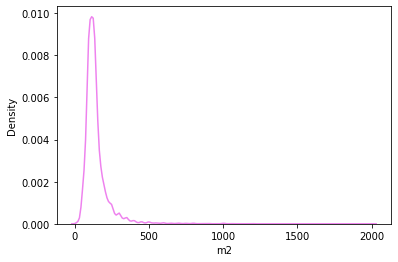

In [77]:
sns.distplot(train.m2 , hist = False , color = "violet");

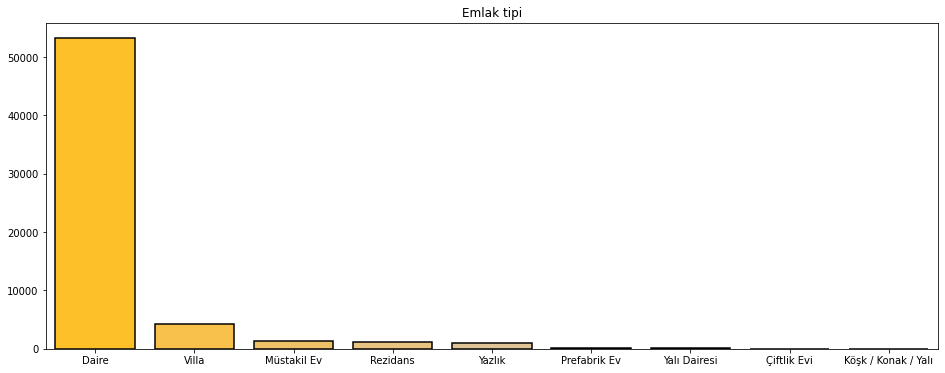

In [78]:
fig = plt.subplots(figsize = (16,6))

sns.barplot(x = train["emlaktipi"].value_counts().index, y = train["emlaktipi"].value_counts().values, palette = color,
           edgecolor = "black", linewidth = 1.5, saturation = 1.5)
plt.title("Emlak tipi");

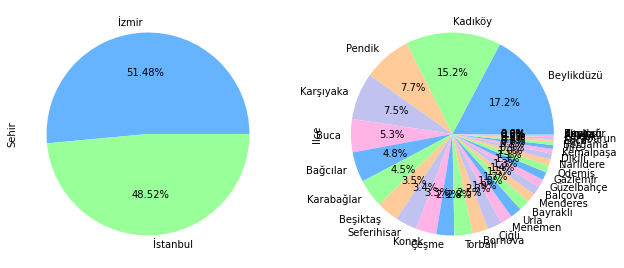

In [79]:
plt.figure(figsize=(10, 12))
colors = ["#66b3ff","#99ff99","#ffcc99","#c2c2f0","#ffb3e6"]

plt.subplot(2, 2, 1)
df["Sehir"].value_counts().plot.pie(autopct = "%1.2f%%" ,colors = colors)

plt.subplot(2, 2, 2)
df["Ilce"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)

plt.xticks(rotation = 90);

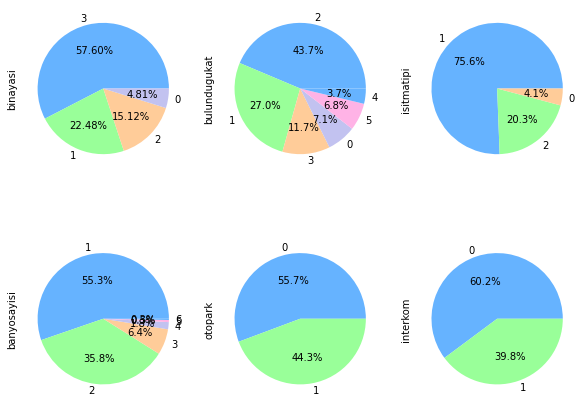

In [80]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 3, 1)
df["binayasi"].value_counts().plot.pie(autopct = "%1.2f%%" , colors = colors)
plt.subplot(3, 3, 2)
df["bulundugukat"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 3)
df["isitmatipi"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 4)
df["banyosayisi"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 5)
df["otopark"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 6)
df["interkom"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)

plt.xticks(rotation = 90);

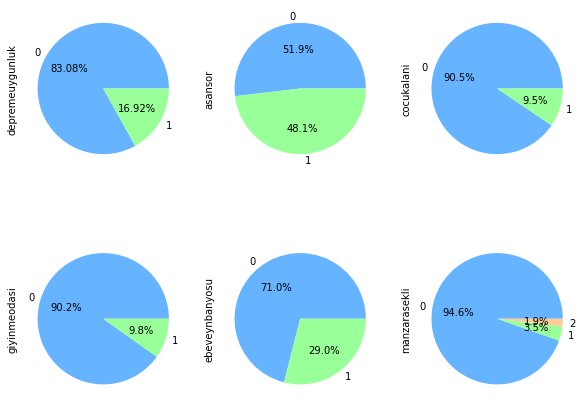

In [81]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 3, 1)
df["depremeuygunluk"].value_counts().plot.pie(autopct = "%1.2f%%" , colors = colors)
plt.subplot(3, 3, 2)
df["asansor"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 3)
df["cocukalani"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 4)
df["giyinmeodasi"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 5)
df["ebeveynbanyosu"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)
plt.subplot(3, 3, 6)
df["manzarasekli"].value_counts().plot.pie(autopct = "%1.1f%%" , colors = colors)

plt.xticks(rotation = 90);

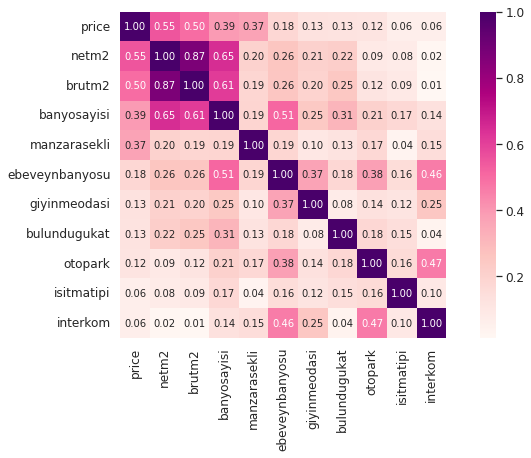

In [82]:
## Korelasyon matrisimiz

df4matrix = df[:train.shape[0]].drop(["m2"],axis = 1)
corrmatrix = df4matrix.corr()
plt.figure(figsize = (12,6))
columnz = corrmatrix.nlargest(11 , "price")["price"].index
cm = np.corrcoef(df4matrix[columnz].values.T)
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm , cbar = True , annot = True , square = True ,
                cmap = "RdPu" , fmt = ".2f" , annot_kws = {"size" : 10} ,
                 yticklabels = columnz.values , xticklabels = columnz.values)
plt.show()

#### 2 yeni değişken : M2ort ve Axscore

brütm2 ile netm2 arasındaki denge için ortalama alıp yeni bir değişken oluşturdum.Bunun sebebi veri setini incelediğimizde brutm2 ve netm2 veri setinde bazen karmakarışık girilmiş bazen sadece brut girilmiş net girilmemiş vsvs. Bu değişken çok mantıklı değil gibi görünse de model için iyi bir değişken olabilir.

Axscore değişkeni seçtiğim bazı değişkenlerin axisdeki değerlerinin toplamından oluşuyor. Bu değişken de model için iyi bir bağımsız değişken olacaktır. 



In [83]:
df["m2ort"] = (df.brutm2 + df.netm2) / 2

features = ["netm2","binayasi","isitmatipi","otopark","interkom","depremeuygunluk","asansor","cocukalani","giyinmeodasi",
           "ebeveynbanyosu","m2","Kur"]

df["axscore"] = df[features].sum(axis = 1)

In [84]:
## kullanmak istemediğim değişkenleri atıyorum.

df = df.drop(["tarih","path","binadakikatsayısı","brutm2","manzara","id","price"] , axis = 1)

In [85]:
df.head()

,oda,netm2,emlaktipi,binayasi,bulundugukat,isitmatipi,banyosayisi,otopark,interkom,depremeuygunluk,asansor,cocukalani,giyinmeodasi,ebeveynbanyosu,m2,manzarasekli,Sehir,Ilce,Mahalle,Yil,Ay,Gun,YilinHaftasi,Kur,kfe,m2ort,axscore
0,5+2,370.000,Daire,1,4,1,3,1,1,1,1,1,1,1,380.000,0,İstanbul,Beylikdüzü,Adnan Kahveci,2019,1,1,1,5.298,100.200,375.000,764.298
1,2+1,55.000,Daire,3,1,1,1,0,1,0,1,0,0,0,65.000,0,İstanbul,Kadıköy,Erenköy,2019,1,1,1,5.298,100.200,60.000,131.298
2,3+1,197.000,Daire,2,2,1,2,1,1,1,1,0,0,1,205.000,0,İstanbul,Beylikdüzü,Adnan Kahveci,2019,1,1,1,5.298,100.200,201.000,415.298
3,3+1,130.000,Daire,1,2,1,2,1,0,0,1,0,0,1,150.000,0,İstanbul,Beşiktaş,Nisbetiye,2019,1,1,1,5.298,100.200,140.000,290.298
4,2+1,95.000,Daire,3,2,1,1,0,0,1,1,1,0,0,110.000,0,İstanbul,Beylikdüzü,Cumhuriyet,2019,1,1,1,5.298,100.200,102.500,217.298


#### Dummy değişkenler 

Kalan kategorik değişkenlerle dummy değişkenler oluşturacağız. Dummy oluşacak değişkenler : oda , emlaktipi , sehir , ilce , mahalle

In [86]:
df = pd.get_dummies(df , columns = ["oda","emlaktipi","Sehir","Ilce","Mahalle"])

Bağımsız değişkenlerimiz artık hazır. Yavaş yavaş ML bölümüne geçiş yapıyoruz.Bundan önce train test geri ayırma ve bağımlı değişkeni log kullanacağım için log alma işlemini yapıyorum.

In [87]:
x_train = df[:train.shape[0]]
x_test = df[train.shape[0]:]
y = np.log1p(train.price.values)

#### Base Models

Birçok algoritma denedim ,bunlardan bazıları : h2o AutoML,LightGBM,SVR,Catboost,FLAutoml .. Fakat bu algoritmalardan beklediğim başarıyı göremedim.Bu yüzden notebooka da bunları koymayacağım.(Vakit bulursam ilerde ekleyeceğim)

XGBoost ve Random Forest algoritmalarını kullanacağım. İlk olarak default parameter değerleriyle rmse skorlarına bakacağım sonra optimizasyon ve ensemble yaparak submission dosyasını oluşturacağım.

#### XGBoost Regressor

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.21 , random_state = 42)

basexgb = xgb.XGBRegressor().fit(X_train,y_train)

In [89]:
predx = basexgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, predx))

0.31320202648245976

#### Random Forest Regressor

In [90]:
baserf = RandomForestRegressor().fit(X_train,y_train)
predr = baserf.predict(X_test)
np.sqrt(mean_squared_error(y_test , predr))

0.311217626174396

#### Optuna


Hyperparameters optimizasyonunda optuna kullanacağım ve herkese de tavsiye ederim:)  Sadece XGBoost için optimizasyon yapabildim vakit problemleri sebebiyle, rf modelini default olarak kullanacağım. Optuna için 15 trial bir optimizasyon planlıyorum. 

Optuna hakkında daha fazla bilgi için : https://optuna.readthedocs.io/en/stable/

In [91]:
def xgbobj(trial , data = x_train , target = y):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.21 , random_state = 42)
    params = {
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",5,20),
        "min_child_weight": trial.suggest_int("min_child_weight",5,20),
    }
    model = xgb.XGBRegressor(**params, tree_method = "gpu_hist",random_state=42)
    model.fit(X_train,y_train,eval_set = [(X_test,y_test)] , verbose = False , eval_metric = "rmse")

    y_preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return rmse

In [92]:
study = optuna.create_study(direction = "minimize")
study.optimize(xgbobj, n_trials = 15)
print("Number of finished trials:", len(study.trials))
print("Best trial: score {}, params {}".format(study.best_trial.value, study.best_trial.params))

[I 2021-11-17 16:59:41,583] A new study created in memory with name: no-name-ed94ca82-0ed0-490a-9126-0a0117cea851
[I 2021-11-17 16:59:51,244] Trial 0 finished with value: 3.606171038363884 and parameters: {'n_estimators': 400, 'subsample': 0.8, 'colsample_bytree': 0.9, 'eta': 0.003165107368602539, 'reg_alpha': 21, 'reg_lambda': 5, 'max_depth': 19, 'min_child_weight': 10}. Best is trial 0 with value: 3.606171038363884.
[I 2021-11-17 17:00:43,721] Trial 1 finished with value: 0.31652665820047 and parameters: {'n_estimators': 2000, 'subsample': 0.7, 'colsample_bytree': 0.6, 'eta': 0.04161478876696635, 'reg_alpha': 48, 'reg_lambda': 49, 'max_depth': 18, 'min_child_weight': 12}. Best is trial 1 with value: 0.31652665820047.
[I 2021-11-17 17:01:12,877] Trial 2 finished with value: 0.321364219152896 and parameters: {'n_estimators': 1700, 'subsample': 1.0, 'colsample_bytree': 0.7, 'eta': 0.04308493247312659, 'reg_alpha': 20, 'reg_lambda': 90, 'max_depth': 5, 'min_child_weight': 8}. Best is tri

Number of finished trials: 15
Best trial: score 0.29089262520580134, params {'n_estimators': 1000, 'subsample': 0.9, 'colsample_bytree': 0.8, 'eta': 0.08189309982011721, 'reg_alpha': 3, 'reg_lambda': 29, 'max_depth': 17, 'min_child_weight': 20}


In [93]:
OPTUNA_OPTIMIZATION = True

In [94]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

In [95]:
# K-Fold

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y, scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)

#### Test seti üzerinde tahminler yapılması, KFold çapraz doğrulama ve submission dosyasının oluşturulması :

**Not** : Kendi localimde çalıştığım için optuna parametreleri ve sonuçlar farklılık gösterebilir.

#### XGBoost with Optuna Hyperparameters

In [96]:
modelxgb = xgb.XGBRegressor(n_estimators = 1400 , subsample = 1.0 , colsample_bytree = 0.9 ,
                      eta = 0.07457354470112766 ,reg_alpha = 1 , reg_lambda = 23 , max_depth = 12,
                          min_child_weight = 19).fit(x_train , y)

In [97]:
xgbpred = np.expm1(modelxgb.predict(x_test))

In [98]:
#score = rmsle_cv(modelxgb)
#print("XGBoost CV Mean: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#### Random Forest Predictions

In [99]:
modelrf = RandomForestRegressor().fit(x_train , y)

In [100]:
rfpred = np.expm1(modelrf.predict(x_test))

In [103]:
score = rmsle_cv(modelrf)
print("Random Forest CV Mean: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest CV Mean: 0.3421 (0.0155)



#### Submission

In [102]:
sub.Expected = (0.7 * xgbpred) + (0.3 * rfpred)

sub.to_csv("submission.csv", index = False)

sub.head()

,Id,Expected
0,64650,928994.628
1,64651,238732.320
2,64652,815861.919
3,64653,238732.320
4,64654,298533.518


Vaktim olduğunda notebook'a AutoML sonuçlarını ve birkaç şey daha eklemeye çalışacağım. Paylaştıkça ben de bu sayede çok şey öğrenebiliyorum :) Teşekkür ediyorum herkesin emeğine sağlık. Sonraki yarışmalarda görüşmek üzere ^^  :3

**In Progress...**

![](http://gif-free.com/uploads/posts/2017-05/1493703506_spongebob-thumb-up.gif)